# 손글씨를 분류해 봅시다.
---

## 데이터 이해하기

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import collections

digits = load_digits()          # 데이터 준비

digits_data = digits.data       # Feature Data 지정하기
digits_label = digits.target    # Label Data 지정하기

print(digits.target_names)      # Target Names 출력해보기
print(digits.DESCR)             # 데이터 Describe 해보기
print(collections.Counter(digits_label))

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7)


[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels a

## 다양한 모델로 학습시켜보기

In [10]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("============================Decision Tree model============================")
print(classification_report(y_test, y_pred))

# RandomForest model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("============================Random Forest============================")
print(classification_report(y_test, y_pred))

# SVM
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("============================SVM============================")
print(classification_report(y_test, y_pred))

# SGD
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print("============================SGD============================")
print(classification_report(y_test, y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("============================LogisticRegression============================")
print(classification_report(y_test, y_pred))

============================Decision Tree model============================
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

============================Random Forest============================
              precision    recall  f1-score   support

           0       1.00      0.98      0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 평가 지표
> Data label count : {3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174}   

> 데이터의 성격과 분류 모델의 목적이 특정 라벨에 편향도 되어 있지 않아 Precision이나 Recall을 쓰기에 적절치 않다.   
> f1-score 같은 경우 Data label들이 불균형 구조일 때 사용 하는데 해당 데이터는 label이 균형적으로 분포하기 때문에  하기 때문에 **`Accuracy`** 로 해당 모델의 성능을 평가하는게 옳다.

# 와인을 분류해 봅시다
---

## 데이터 이해

In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import collections

wine = load_wine()          # 데이터 준비

wine_data = wine.data       # Feature Data 지정하기
wine_label = wine.target    # Label Data 지정하기

print(wine.target_names)    # Target Names 출력해보기
print(wine.DESCR)           # 데이터 Describe 해보기
print(collections.Counter(wine_label))

#test, train 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7) 

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

## 다양한 모델로 학습 시켜보기

In [12]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("============================Decision Tree model============================")
print(classification_report(y_test, y_pred))

# RandomForest model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("============================Random Forest============================")
print(classification_report(y_test, y_pred))

# SVM
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("============================SVM============================")
print(classification_report(y_test, y_pred))

# SGD
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print("============================SGD============================")
print(classification_report(y_test, y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("============================LogisticRegression============================")
print(classification_report(y_test, y_pred))

============================Decision Tree model============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

============================Random Forest============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

============================SVM============================
              precision    recal

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 평가 지표
> Data label Count : {1: 71, 0: 59, 2: 48}

> 데이터의 성격과 분류 모델의 목적이 특정 라벨에 편향도 되어 있지 않아 Precision이나 Recall을 쓰기에 적절치 않다.   
> f1-score 같은 경우 Data label 들이 불균형할 때 사용 하는데 해당 데이터는      
> Data label 들이 불균형 하기 때문에 **`f1-score`**로 모델 성능을 평가하는게 옳다.



# 유방암 여부를 진단해 봅시다
---

## 데이터 이해

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import collections

#['malignant' 'benign'] : 0 이면 암, 1 이면 그냥 종양
cancer = load_breast_cancer()          # 데이터 준비

cancer_data = cancer.data       # Feature Data 지정하기
cancer_label = cancer.target    # Label Data 지정하기

print(cancer.target_names)    # Target Names 출력해보기
print(cancer.DESCR)           # 데이터 Describe 해보기
print(collections.Counter(cancer_label))

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=7)

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, fi

## 다양한 모델로 학습시켜보기

In [14]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("============================Decision Tree model============================")
print(classification_report(y_test, y_pred))

# RandomForest model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("============================Random Forest============================")
print(classification_report(y_test, y_pred))

# SVM
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("============================SVM============================")
print(classification_report(y_test, y_pred))

# SGD
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print("============================SGD============================")
print(classification_report(y_test, y_pred))

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("============================LogisticRegression============================")
print(classification_report(y_test, y_pred))

============================Decision Tree model============================
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

============================Random Forest============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

============================SVM============================
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 평가지표
> Counter({1: 71, 0: 59, 2: 48})    
   
> ['malignant' 'benign'] : 0 이면 암, 1 이면 그냥 종양             
> 데이터의 성격과 분류 모델의 목적을 파악했을 때
> 암에 걸렸는지 걸리지 않았는지 분류하는 모델의 경우              
> 실제 암인 사람들을 놓치지 않고 파악하는게 중요하므로     
> `Recall(재현율)`을 사용하는게 맞다. 

# 회고
---

- 이번 프로젝트에서 **어려웠던 점,**
    - 분류 성능 지표를 어떨 때 사용하는지 이해하는게 어려웠다.
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
    - 해당 노드를 시작 전에는 무조건 Accuracy 높게 나오면 좋다고 생각 했는데, 데이터의 성격과 분류 모델의 목적에 따라 recall, precision, f1-score의 성능지표로 성능을 평가할 수 있다는 걸 알았다.
    - 학습 및 분류 코드를 숙달 반복 하며 머신 러닝 과정을 좀 더 이해할 수 있었다.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
    - 3가지 데이터 셋에 대해 모델의 평가지표가 적절히 선택되었는가라는 항목에 대해 확인을 위해 여러 설명 자료 및 예제들을 찾아보고 이해하려고 힘썻다.
- **자기 다짐**
    - 이해가 안될때는 코드 필사를 하며 이해하려고 노력해야겠다.
    - 성능 평가 전 데이터의 성격와 분류모델의 목적을 정확히 파악하는데 힘써야 한다.

# 분류 성능 지표 정리
---

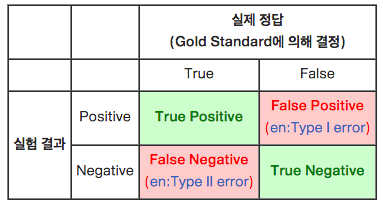

True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)           
False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)            
False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)          
True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)                      

* 정밀도 (Precision)
    * TP / (TP + FP)
    * True라고 분류한 것 중 실제 True 인 것의 비율
* 재현율 (Recall)
    * TP / TP + FN
    * 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
* F1 Score
    * 2 * (Precision*Recall / Precision+Recall)
    * label이 불균형 구조일 때, 모델의 성능을 정화하게 평가할 수 있음